<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_13_L'algoritmo_di_Deutsche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

## Problema versione 1 e soluzione classica

In [2]:
def f0(x):
  return 0

In [3]:
def f1(x):
  return x

In [4]:
def f2(x):
  if x == 0:
    return 1
  return 0

In [5]:
def f3(x):
  return 1

In [7]:
funzioni = [f0, f1, f2, f3]
funzioni

[<function __main__.f0(x)>,
 <function __main__.f1(x)>,
 <function __main__.f2(x)>,
 <function __main__.f3(x)>]

In [9]:
funzioni[1](1)

1

In [23]:
f = funzioni[np.random.randint(4)]
print(f)
if f(0) == f(1):
  print("Costante")
else:
  print("Bilanciata")

<function f1 at 0x78f886f33400>
Bilanciata


## Problema versione 2 e soluzione classica

In [25]:
def binary_array_to_decimal(arr):
  decimal_number = 0
  n = len(arr)
  for i in range(n):
    decimal_number += arr[n-1-i] * (2**i)
  return decimal_number

print(binary_array_to_decimal([1]))
print(binary_array_to_decimal([1, 0]))
print(binary_array_to_decimal([1, 0, 1, 1]))
print(binary_array_to_decimal([1, 1, 1, 1, 1, 1]))

1
2
11
63


In [29]:
def f0(x1, x2, x3, x4, x5, x6):
  return 0

def f1(x1, x2, x3, x4, x5, x6):
  decimal = binary_array_to_decimal([x1, x2, x3, x4, x5, x6])
  if decimal < 32:
    return 1
  return 0

def f2(x1, x2, x3, x4, x5, x6):
  decimal = binary_array_to_decimal([x1, x2, x3, x4, x5, x6])
  if decimal > 31:
    return 1
  return 0

def f3(x1, x2, x3, x4, x5, x6):
  return 1

funzioni = [f0, f1, f2, f3]
funzioni

[<function __main__.f0(x1, x2, x3, x4, x5, x6)>,
 <function __main__.f1(x1, x2, x3, x4, x5, x6)>,
 <function __main__.f2(x1, x2, x3, x4, x5, x6)>,
 <function __main__.f3(x1, x2, x3, x4, x5, x6)>]

In [33]:
def test():
  f = funzioni[np.random.randint(4)]
  print(f)
  value = f(0, 0, 0, 0, 0, 0)
  try_count = 0
  for i in range(2):
    for j in range(2):
      for k in range(2):
        for l in range(2):
          for m in range(2):
            for n in range(2):
              new_value = f(i, j, k, l, m, n)
              if new_value != value:
                print("Bilanciata")
                return
              try_count += 1
              if try_count > 32:
                print("Costante")
                return
test()

<function f0 at 0x78f87df24550>
Costante


## Problema versione 2 e soluzione quantistica

In [34]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [73]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile

from qiskit.visualization import plot_histogram

In [36]:
n = 3

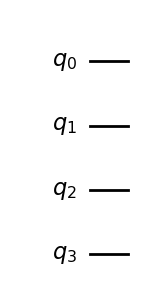

In [37]:
const_oracle_zero = QuantumCircuit(n+1)
const_oracle_zero.draw(output="mpl")

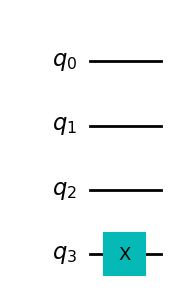

In [38]:
const_oracle_one = QuantumCircuit(n+1)
const_oracle_one.x(n)
const_oracle_one.draw(output="mpl")

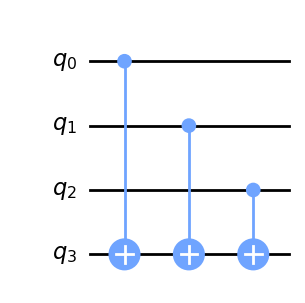

In [39]:
balanced_oracle_zero = QuantumCircuit(n+1)
for qubit in range(n):
  balanced_oracle_zero.cx(qubit, n)
balanced_oracle_zero.draw(output="mpl")

In [40]:
# 000 = 0
# 001 = 1
# 010 = 1
# 011 = 0
# 100 = 1
# 101 = 0
# 110 = 0
# 111 = 1

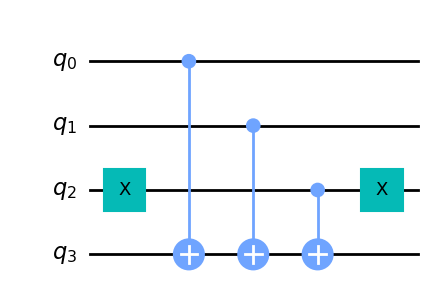

In [41]:
balanced_oracle_one = QuantumCircuit(n+1)
balanced_oracle_one.x(2)
for qubit in range(n):
  balanced_oracle_one.cx(qubit, n)
balanced_oracle_one.x(2)
balanced_oracle_one.draw(output="mpl")

In [42]:
# 000 = 1
# 001 = 0
# 010 = 0
# 011 = 1
# 100 = 0
# 101 = 1
# 110 = 1
# 111 = 0

In [44]:
oracoli = [balanced_oracle_zero, balanced_oracle_one, const_oracle_zero, const_oracle_one]

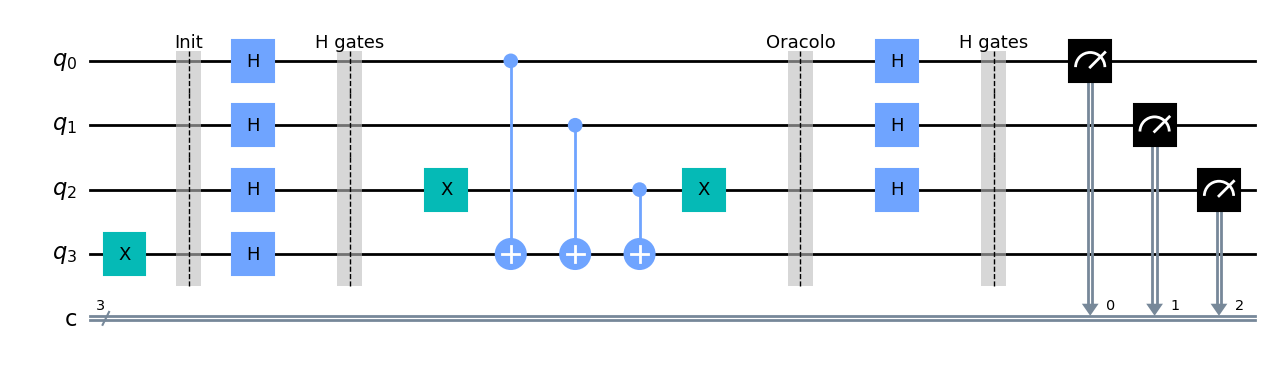

In [60]:
dj_circuit = QuantumCircuit(n+1, n)
dj_circuit.x(n)
dj_circuit.barrier(label="Init")

for qubit in range(n+1):
  dj_circuit.h(qubit)
dj_circuit.barrier(label="H gates")

oracolo = np.random.randint(len(oracoli))
dj_circuit = dj_circuit.compose(oracoli[oracolo])
dj_circuit.barrier(label="Oracolo")

for qubit in range(n):
  dj_circuit.h(qubit)
dj_circuit.barrier(label="H gates")
dj_circuit.measure([0,1,2], [0,1,2])

dj_circuit.draw(output="mpl")

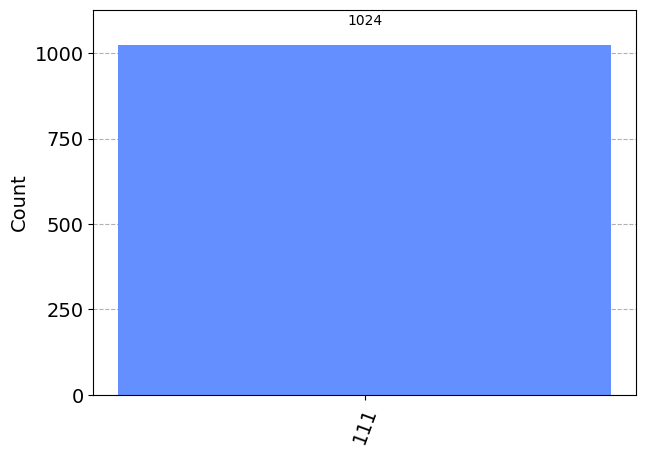

In [61]:
aer_sim = Aer.get_backend("aer_simulator")
results = aer_sim.run(dj_circuit).result()
plot_histogram(results.get_counts())

## Circuito con oracolo generalizzato

In [66]:
def dj_oracle(balanced, n):
  circuit = QuantumCircuit(n+1)
  if balanced:
    b = np.random.randint(0, 2, n)
    for i in range(n):
      if b[i] == 1:
        circuit.x(i)
    for i in range(n):
      circuit.cx(i, n)
    for i in range(n):
      if b[i] == 1:
        circuit.x(i)
  else:
    output = np.random.randint(2)
    if output == 1:
      circuit.x(n)
  gate = circuit.to_gate()
  gate.name = "Oracle"
  return gate

In [70]:
def dj_algorithm(oracle, n):
  dj_circuit = QuantumCircuit(n+1, n)
  dj_circuit.x(n)

  for qubit in range(n+1):
    dj_circuit.h(qubit)

  dj_circuit.append(oracle, range(n+1))

  for qubit in range(n):
    dj_circuit.h(qubit)

  for i in range(n):
    dj_circuit.measure(i, i)

  return dj_circuit

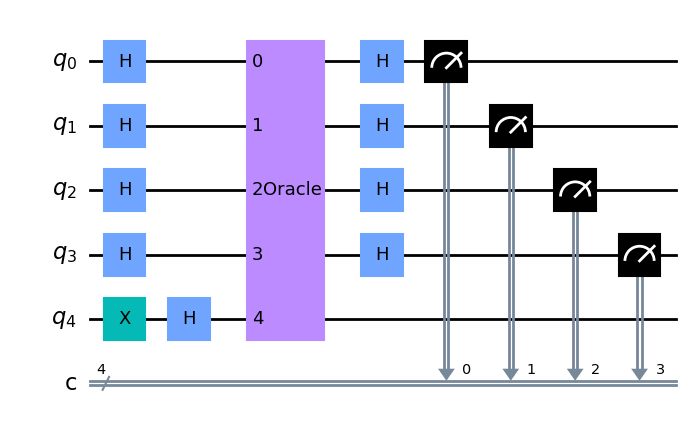

In [75]:
n = 4
oracle_gate = dj_oracle(True, n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output="mpl")

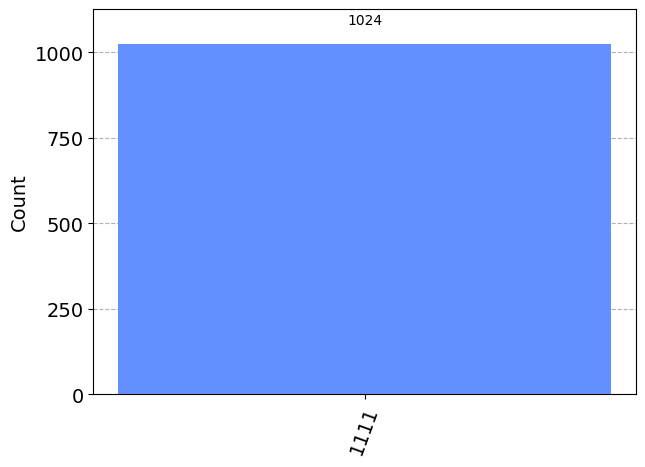

In [76]:
aer_sim = Aer.get_backend("aer_simulator")
dj_circuit_tranpiled = transpile(dj_circuit, aer_sim)

results = aer_sim.run(dj_circuit_tranpiled).result()
plot_histogram(results.get_counts())